## +++++++++++++++++++++++++MINI PROJECT+++++++++++++++++++++++++++++++ 

### +++++++++++++++++++++++++++++SENTIMENT ANALYSIS+++++++++++++++++++++++++++++++++++

### NAIVE BAYES APPROACH

### IMPORTING LIBRARIES


In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### IMPORTING DATASET

In [4]:
start=time.time()
dataset = pd.read_csv(r'C:\Users\Dell\3D Objects\DWDM\movie.csv')


### DOWNLOAD STOPWORD FILES

In [5]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

### USAGE OF STOP WORD FILES

In [6]:
stopstart=time.time()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 10000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
stopend=time.time()

### APPLYING FEATURE EXTRACTION

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['positive' 'positive' 'positive' ... 'negative' 'positive' 'negative']


### GAUSSIAN RULE

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print(len(y_pred))
print(len(y_test))
first20=np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

2000
2000
[['negative' 'positive']
 ['negative' 'negative']
 ['negative' 'negative']
 ...
 ['negative' 'negative']
 ['positive' 'positive']
 ['positive' 'positive']]


### CONFUSION MATRIX AND ACCURACY SCORE

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
end=time.time()
print("TIME REQUIRED FOR THE JOURNEY")
totaltime=end-start
print(totaltime)

[[827 147]
 [304 722]]
0.7745
TIME REQUIRED FOR THE JOURNEY
70.66309404373169


In [10]:
from sklearn.metrics import classification_report

a=classification_report(y_test,y_pred)

print("Report: " , classification_report(y_test,y_pred))

Report:                precision    recall  f1-score   support

    negative       0.73      0.85      0.79       974
    positive       0.83      0.70      0.76      1026

    accuracy                           0.77      2000
   macro avg       0.78      0.78      0.77      2000
weighted avg       0.78      0.77      0.77      2000



## +++++++++++++++++++++++++MINI PROJECT+++++++++++++++++++++++++++++++ 

### +++++++++++++++++++++++++++++SENTIMENT ANALYSIS+++++++++++++++++++++++++++++++++++

### DEEP LEARNING APPROACH


### IMPORTING LIBRARIES

### IMPORTING DATASET

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

start=time.time()

#dataset1 = pd.read_csv(r'C:\Users\Dell\3D Objects\DWDM\IMDB Dataset.csv')

### CLEANING THE TEXT

In [12]:
# import re
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# corpus = []
# for i in range(0, 50000):
#     review = re.sub('[^a-zA-Z]', ' ', dataset1['review'][i])
#     review = review.lower()
#     review = review.split()
#     ps = PorterStemmer()
#     review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
#     review = ' '.join(review)
#     corpus.append(review)
#     #print("done")


### Creating the Bag of Words model

In [13]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values
print(len(y))
print("done")
#print(x)
l=[]
for i in range(0,len(y)):
    if(y[i]=="positive"):
        l.append(0)
    elif(y[i]=="negative"):
        l.append(1)
    else:
        l.append(2)
print(len(l))    
    
l = np.array(l)
print(X)
print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, l, test_size = 0.2, random_state = 0)


10000
done
10000
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['positive' 'positive' 'positive' ... 'negative' 'positive' 'negative']


### first model implemented
### applying the ANN

In [14]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("done")

done


### part lets make the ann

In [15]:
print("starting the ann")
import keras
from keras.models import Sequential
from keras.layers import Dense

print("start")
#initialize the ann
classi=Sequential()

#adding the input layer and first hidden layers
classi.add(Dense(units=3,kernel_initializer='uniform',activation='relu',input_dim=1500))

#adding the second hidden layer
classi.add(Dense(units=3,kernel_initializer='uniform',activation='relu',input_dim=1500))

#adding the output layers
classi.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

#compiling the ann
classi.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

#fitting the ANN
c1=classi.fit(X_train,y_train,batch_size=10,epochs=100)

print("done")
print(c1)

starting the ann
start
Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.5317 - accuracy: 0.7861
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3346 - accuracy: 0.9064
Epoch 3/100
800/800 [==============================] - 1s 1ms/step - loss: 0.2516 - accuracy: 0.9314
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.2014 - accuracy: 0.9461
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.1722 - accuracy: 0.9521
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.1543 - accuracy: 0.9572
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.1479 - accuracy: 0.9581
Epoch 8/100
800/800 [==============================] - 1s 1ms/step - loss: 0.1356 - accuracy: 0.9624
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.1303 - accuracy: 0.9641
Epoch 10/100
800/800 [==============================] - 1s 1ms/step 

800/800 [==============================] - 1s 1ms/step - loss: 0.0800 - accuracy: 0.9705
Epoch 82/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0833 - accuracy: 0.9703
Epoch 83/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0779 - accuracy: 0.9714
Epoch 84/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0795 - accuracy: 0.9709
Epoch 85/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0729 - accuracy: 0.9722
Epoch 86/100
800/800 [==============================] - 2s 2ms/step - loss: 0.0722 - accuracy: 0.9715
Epoch 87/100
800/800 [==============================] - 2s 3ms/step - loss: 0.0830 - accuracy: 0.9703
Epoch 88/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 0.9714
Epoch 89/100
800/800 [==============================] - 1s 2ms/step - loss: 0.0744 - accuracy: 0.9721
Epoch 90/100
800/800 [==============================] - 1s 1ms/step - loss: 0.0707 - accuracy: 

In [16]:
y_pred = classi.predict(X_test)
y_pred = (y_pred > 0.5)
first2_20=(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [1 1]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
end=time.time()
print("TIME REQUIRED FOR THE JOURNEY")
totaltime2=(end-start)+(stopend-stopstart)
print(totaltime2)

[[904 122]
 [169 805]]
0.8545
TIME REQUIRED FOR THE JOURNEY
211.8103129863739


In [30]:
b=classification_report(y_test,y_pred)
print("Report: " , classification_report(y_test,y_pred))


Report:                precision    recall  f1-score   support

           0       0.84      0.88      0.86      1026
           1       0.87      0.83      0.85       974

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



## DATA VISUALISATION

### PIE CHART

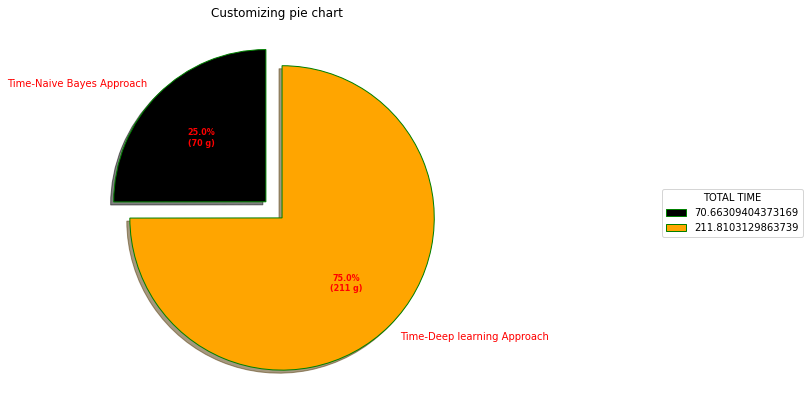

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
  

Approach = ['Time-Naive Bayes Approach', 'Time-Deep learning Approach'] 
  
data = [totaltime,totaltime2]     
    
# Creating dataset 

  
# Creating explode data 
explode = (0.1, 0.05) 
  
# Creating color parameters 
colors = ( "black", "orange") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = Approach, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="red")) 
  
# Adding legend 
ax.legend(wedges,data, 
          title ="TOTAL TIME", 
          loc ="center left", 
          bbox_to_anchor =(1.5, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Customizing pie chart") 
  
# show plot 
plt.show() 


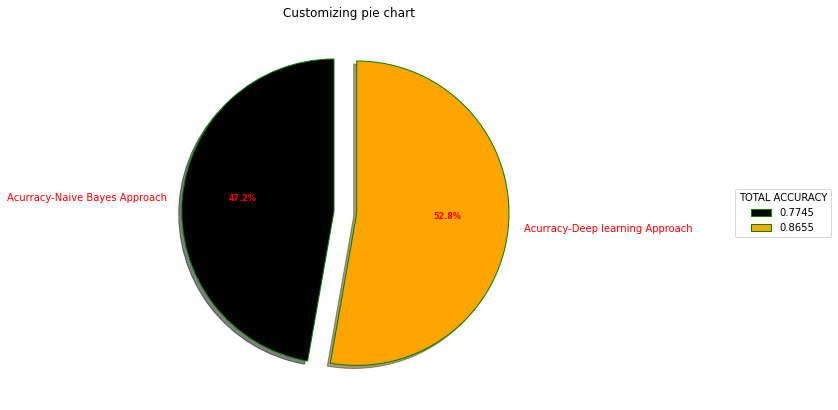

In [20]:
import numpy as np 
import matplotlib.pyplot as plt 
  

Approach = ['Acurracy-Naive Bayes Approach', 'Acurracy-Deep learning Approach'] 
  
data = [0.7745,0.8655]     
    
# Creating dataset 

  
# Creating explode data 
explode = (0.1, 0.05) 
  
# Creating color parameters 
colors = ( "black", "orange") 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = Approach, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="red")) 
  
# Adding legend 
ax.legend(wedges,data, 
          title ="TOTAL ACCURACY", 
          loc ="center left", 
          bbox_to_anchor =(1.5, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Customizing pie chart") 
  
# show plot 
plt.show() 


## MONKEY LEARN APPROACH

In [21]:
dataset = pd.read_csv(r'C:\Users\Dell\3D Objects\DWDM\processed_batch.csv')
dataset

,review,sentiment,Classification,Confidence
0,One of the other reviewers has mentioned that ...,positive,Positive,0.767
1,A wonderful little production. <br /><br />The...,positive,Positive,1.000
2,I thought this was a wonderful way to spend ti...,positive,Positive,0.969
3,Basically there's a family where a little boy ...,negative,Negative,0.976
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Positive,0.991
5,"Probably my all-time favorite movie, a story o...",positive,Positive,0.994
6,I sure would like to see a resurrection of a u...,positive,Positive,0.953
7,"This show was an amazing, fresh & innovative i...",negative,Negative,1.000
8,Encouraged by the positive comments about this...,negative,Negative,0.999
9,If you like original gut wrenching laughter yo...,positive,Positive,0.983


In [22]:
sentiment = dataset.iloc[:, 1].values
print(sentiment)
classification= dataset.iloc[:, -2].str.lower().values
print(classification)
#classification = classification.tolist()

#print(classification)
count=0
for i in range(0,19):
    if(sentiment[i]==classification[i]):
        count=count+1
print("Accuracy:")
print(count/19)
    
    

['positive' 'positive' 'positive' 'negative' 'positive' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'positive' 'negative'
 'positive' nan]
['positive' 'positive' 'positive' 'negative' 'positive' 'positive'
 'positive' 'negative' 'negative' 'positive' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'positive' nan]
Accuracy:
0.9473684210526315


### INFERENCES

#### BAR CHART

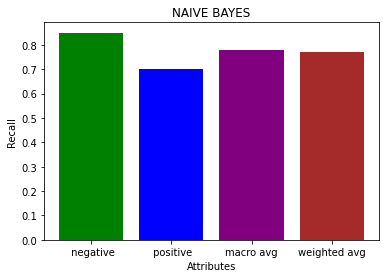

In [37]:
import matplotlib.pyplot as plt

Attributes = [' negative',' positive','macro avg','weighted avg']
Recall = [0.85,0.70,0.78,0.77]
New_Colors = ['green','blue','purple','brown']
plt.bar(Attributes, Recall,color=New_Colors)
plt.title('NAIVE BAYES')
plt.xlabel('Attributes')
plt.ylabel('Recall')
plt.show()

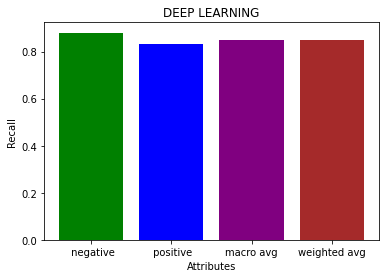

In [39]:
import matplotlib.pyplot as plt

Attributes = [' negative',' positive','macro avg','weighted avg']
Recall = [0.88,0.83,0.85,0.85]
New_Colors = ['green','blue','purple','brown']
plt.bar(Attributes, Recall,color=New_Colors)
plt.title('DEEP LEARNING')
plt.xlabel('Attributes')
plt.ylabel('Recall')
plt.show()